## <font color='violet'>API DATA BANK </font>

Se obtuvieron dos indicadores importantes a nivel macroeconómico de India mediante la API del Data Bank del Banco Mundial. Debido a restricciones de solicitud, se recopilaron dos indicadores clave en lugar de más de 100 filas de datos. Estos indicadores son relevantes para el proyecto de Home Credit. Ademas se tomó los mismos indicadores para USA, de forma que sea posible la comparación.

El primero de ellos es la tasa de interés real, que desempeña un papel crucial al evaluar la propensión de las personas y entidades a solicitar créditos. Una tasa de interés real más alta puede influir en la decisión de una persona o entidad para buscar financiamiento, ya que afecta directamente los costos de endeudamiento.

El segundo indicador es la proporción de créditos otorgados al sector privado en relación con la tasa monetaria. Esta métrica nos brinda información valiosa sobre si Home Credit ha proporcionado financiamiento y liquidez para el crecimiento y desarrollo de las empresas en India. Esta relación también puede estar correlacionada con el empleo de los prestatarios, ya que un mayor acceso al crédito puede fomentar la expansión y creación de empleo en el sector privado.

Estos indicadores son de gran relevancia para el análisis y evaluación de las condiciones económicas y el impacto de Home Credit en el entorno financiero de India.

In [80]:
import json
import  pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

##### Requerimiento: indicadores India

In [2]:
tasa_interes_real_anual_india = requests.get('https://api.worldbank.org/v2/country/IN/indicator/FR.INR.RINR?format=json')

In [3]:
creditos_sector_privado_como_porcentaje_tasa_monetaria_india = requests.get('https://api.worldbank.org/v2/country/IN/indicator/FD.AST.PRVT.GD.ZS?format=json')

#####  Requerimiento:  indicadores USA

In [4]:
tasa_interes_real_anual_USA = requests.get('https://api.worldbank.org/v2/country/USA/indicator/FR.INR.RINR?format=json')

In [5]:
creditos_sector_privado_como_porcentaje_tasa_monetaria_USA = requests.get('https://api.worldbank.org/v2/country/USA/indicator/FD.AST.PRVT.GD.ZS?format=json')

In [6]:
print(creditos_sector_privado_como_porcentaje_tasa_monetaria_USA.text)

[{"page":1,"pages":2,"per_page":50,"total":63,"sourceid":"2","lastupdated":"2023-06-29"},[{"indicator":{"id":"FD.AST.PRVT.GD.ZS","value":"Domestic credit to private sector by banks (% of GDP)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2022","value":51.6413607771199,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FD.AST.PRVT.GD.ZS","value":"Domestic credit to private sector by banks (% of GDP)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2021","value":50.4138998921936,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FD.AST.PRVT.GD.ZS","value":"Domestic credit to private sector by banks (% of GDP)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2020","value":53.9189825695678,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FD.AST.PRVT.GD.ZS","value":"Domestic credit to private sector by banks (% of GDP)"},"country":{"id":"US","value":"United States"},"cou

##### Carga de datos

In [7]:
respuesta1 = json.loads(tasa_interes_real_anual_india.text)
respuesta2 = json.loads(creditos_sector_privado_como_porcentaje_tasa_monetaria_india.text)
respuesta3 = json.loads(tasa_interes_real_anual_USA.text)
respuesta4 = json.loads(creditos_sector_privado_como_porcentaje_tasa_monetaria_USA.text)

In [8]:
metadatos1, datos1 = respuesta1[0], respuesta1[1]
metadatos2, datos2 = respuesta2[0], respuesta2[1]
metadatos3, datos3 = respuesta3[0], respuesta3[1]
metadatos4, datos4 = respuesta4[0], respuesta4[1]

In [9]:
df_tasa_real_int_ind = pd.DataFrame.from_dict(datos1)
df_creditos_ind = pd.DataFrame.from_dict(datos2)
df_tasa_real_int_us = pd.DataFrame.from_dict(datos3)
df_creditos_us = pd.DataFrame.from_dict(datos4)

In [10]:
df_tasa_real_int_ind.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2022,0.229815,,,1
1,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2021,0.147236,,,1
2,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2020,4.203910,,,1
3,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2019,6.894875,,,1
4,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2018,5.361666,,,1


In [11]:
df_creditos_ind.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2022,NaN,,,1
1,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2021,50.412164,,,1
2,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2020,54.571722,,,1
3,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2019,50.742462,,,1
4,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2018,50.338163,,,1


In [12]:
df_tasa_real_int_us.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'US', 'value': 'United States'}",USA,2022,NaN,,,1
1,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'US', 'value': 'United States'}",USA,2021,-1.189357,,,1
2,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'US', 'value': 'United States'}",USA,2020,2.210411,,,1
3,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'US', 'value': 'United States'}",USA,2019,3.427090,,,1
4,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'US', 'value': 'United States'}",USA,2018,2.441415,,,1


In [13]:
df_creditos_us.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'US', 'value': 'United States'}",USA,2022,51.641361,,,1
1,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'US', 'value': 'United States'}",USA,2021,50.413900,,,1
2,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'US', 'value': 'United States'}",USA,2020,53.918983,,,1
3,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'US', 'value': 'United States'}",USA,2019,51.996892,,,1
4,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'US', 'value': 'United States'}",USA,2018,52.094675,,,1


##### Renombrar variables

In [14]:
dic_credit = {'countryiso3code': 'country_code', 'value': 'credit_to_private_sector', 'indicator':'indicator_credit'}
dic_real_int ={'countryiso3code': 'country_code', 'value': 'real_interest_rate', 'indicator':'indicator_real_int'}

In [15]:
#interes real India
df_tasa_real_int_ind['indicator'] = 'Real interest rate INDIA (%)'
df_tasa_real_int_ind['country'] = 'India'
df_tasa_real_int_ind = df_tasa_real_int_ind.rename(columns=dic_real_int)

In [16]:
#credito privado India
df_creditos_ind['indicator'] = 'Domestic credit to private sector INDIA (% of GDP)'
df_creditos_ind['country'] = 'India'
df_creditos_ind = df_creditos_ind.rename(columns=dic_credit)

In [17]:
#interes real USA
df_tasa_real_int_us['indicator'] = 'Real interest rate USA (%)'
df_tasa_real_int_us['country'] = 'USA'
df_tasa_real_int_us = df_tasa_real_int_us.rename(columns=dic_real_int)

In [18]:
#credito privado USA
df_creditos_us['indicator'] = 'Domestic credit to private sector USA (% of GDP)'
df_creditos_us['country'] = 'USA'
df_creditos_us = df_creditos_us.rename(columns=dic_credit)

##### Unión de dataframes

In [19]:
df1 = pd.merge(df_tasa_real_int_ind, df_creditos_ind, on =['country','date', 'country_code'],how= 'inner')
df1.head()

,indicator_real_int,country,country_code,date,real_interest_rate,unit_x,obs_status_x,decimal_x,indicator_credit,credit_to_private_sector,unit_y,obs_status_y,decimal_y
0,Real interest rate INDIA (%),India,IND,2022,0.229815,,,1,Domestic credit to private sector INDIA (% of ...,NaN,,,1
1,Real interest rate INDIA (%),India,IND,2021,0.147236,,,1,Domestic credit to private sector INDIA (% of ...,50.412164,,,1
2,Real interest rate INDIA (%),India,IND,2020,4.203910,,,1,Domestic credit to private sector INDIA (% of ...,54.571722,,,1
3,Real interest rate INDIA (%),India,IND,2019,6.894875,,,1,Domestic credit to private sector INDIA (% of ...,50.742462,,,1
4,Real interest rate INDIA (%),India,IND,2018,5.361666,,,1,Domestic credit to private sector INDIA (% of ...,50.338163,,,1


In [20]:
df2 = pd.merge(df_tasa_real_int_us, df_creditos_us, on =['country','date', 'country_code'],how= 'inner')
df2.head()

,indicator_real_int,country,country_code,date,real_interest_rate,unit_x,obs_status_x,decimal_x,indicator_credit,credit_to_private_sector,unit_y,obs_status_y,decimal_y
0,Real interest rate USA (%),USA,USA,2022,NaN,,,1,Domestic credit to private sector USA (% of GDP),51.641361,,,1
1,Real interest rate USA (%),USA,USA,2021,-1.189357,,,1,Domestic credit to private sector USA (% of GDP),50.413900,,,1
2,Real interest rate USA (%),USA,USA,2020,2.210411,,,1,Domestic credit to private sector USA (% of GDP),53.918983,,,1
3,Real interest rate USA (%),USA,USA,2019,3.427090,,,1,Domestic credit to private sector USA (% of GDP),51.996892,,,1
4,Real interest rate USA (%),USA,USA,2018,2.441415,,,1,Domestic credit to private sector USA (% of GDP),52.094675,,,1


In [75]:
df1.head()

,date,country_code,country,indicator_real_int,real_interest_rate,indicator_credit,credit_to_private_sector
0,2022,IND,India,Real interest rate INDIA (%),0.229815,Domestic credit to private sector INDIA (% of ...,50.412164
1,2021,IND,India,Real interest rate INDIA (%),0.147236,Domestic credit to private sector INDIA (% of ...,50.412164
2,2020,IND,India,Real interest rate INDIA (%),4.203910,Domestic credit to private sector INDIA (% of ...,54.571722
3,2019,IND,India,Real interest rate INDIA (%),6.894875,Domestic credit to private sector INDIA (% of ...,50.742462
4,2018,IND,India,Real interest rate INDIA (%),5.361666,Domestic credit to private sector INDIA (% of ...,50.338163


##### Deteccion de outliers

Se crea una función que sea 3 veces el rango intercuartil porque en una serie de tiempo, es común encontrar variaciones más pronunciadas y rápidas en los datos en comparación con datos de secciones transversales. Un factor de multiplicación de 3 puede ser más adecuado para capturar estas variaciones más grandes y detectar valores atípicos que se desvían significativamente de la tendencia general de la serie.

In [81]:
def detectar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 3 * iqr
    limite_superior = q3 + 3 * iqr

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    plt.figure(figsize=(6, 4))
    sns.boxplot(df[columna])
    plt.title(f'Outliers en {columna}')
    plt.show()

    print(f'Outliers en {columna}:')
    print(outliers)


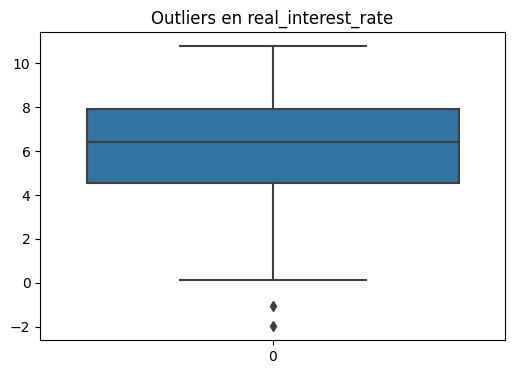

Outliers en real_interest_rate:
Empty DataFrame
Columns: [date, country_code, country, indicator_real_int, real_interest_rate, indicator_credit, credit_to_private_sector]
Index: []


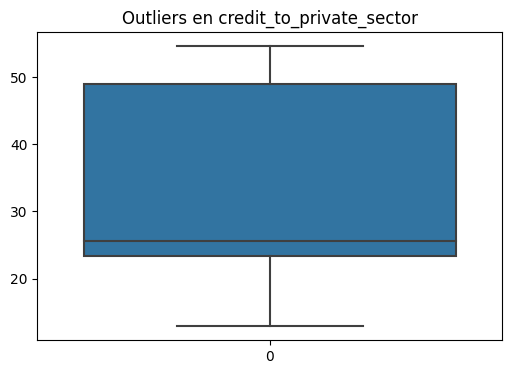

Outliers en credit_to_private_sector:
Empty DataFrame
Columns: [date, country_code, country, indicator_real_int, real_interest_rate, indicator_credit, credit_to_private_sector]
Index: []


In [82]:
detectar_outliers(df1, 'real_interest_rate')
detectar_outliers(df1, 'credit_to_private_sector')

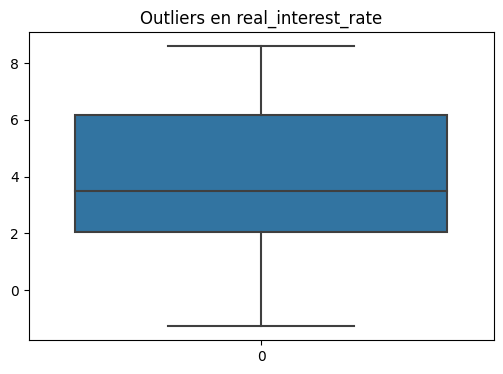

Outliers en real_interest_rate:
Empty DataFrame
Columns: [date, country_code, country, indicator_real_int, real_interest_rate, indicator_credit, credit_to_private_sector]
Index: []


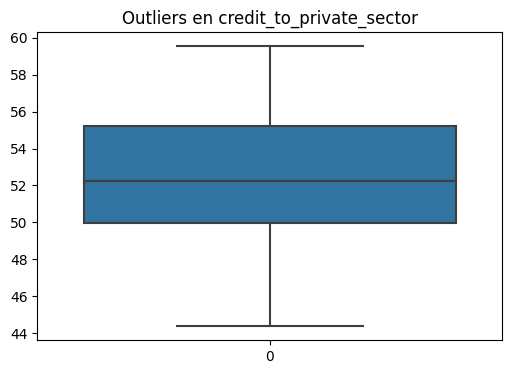

Outliers en credit_to_private_sector:
Empty DataFrame
Columns: [date, country_code, country, indicator_real_int, real_interest_rate, indicator_credit, credit_to_private_sector]
Index: []


In [83]:
detectar_outliers(df2, 'real_interest_rate')
detectar_outliers(df2, 'credit_to_private_sector')

##### Selección de variables, conversión de datos e interpolacion

Se crea una serie de tiempo para df1 porque unen df1 y df2 y si se convierte en indice 'date' para la interpolación no permite repetir numeros

In [21]:
#se toma las columnas importantes
column_order = ['date','country_code', 'country', 'indicator_real_int', 'real_interest_rate', 'indicator_credit', 'credit_to_private_sector']
df1 = df1[column_order]
df2 = df2[column_order]

In [22]:
df1.isnull().sum(), df2.isnull().sum()

(date                        0
 country_code                0
 country                     0
 indicator_real_int          0
 real_interest_rate          5
 indicator_credit            0
 credit_to_private_sector    1
 dtype: int64,
 date                        0
 country_code                0
 country                     0
 indicator_real_int          0
 real_interest_rate          1
 indicator_credit            0
 credit_to_private_sector    0
 dtype: int64)

In [23]:
#se tranforma año a dato tipo fecha
df1['date'] = pd.to_datetime(df1['date']).dt.year

In [24]:
#se convierte en indice año
df1.set_index('date', inplace=True)

In [25]:
# Realizar la interpolación para nulos
df1['real_interest_rate'] = df1['real_interest_rate'].interpolate()
df1['credit_to_private_sector'] = df1['credit_to_private_sector'].fillna(50.412164)
df2['real_interest_rate'] = df2['real_interest_rate'].fillna(-1.189357)
df1.reset_index(inplace=True)

##### Concatenación de paises

In [26]:
df_merged = pd.concat([df1, df2], axis=0).reset_index(drop=True)
df_merged.head()

,date,country_code,country,indicator_real_int,real_interest_rate,indicator_credit,credit_to_private_sector
0,2022,IND,India,Real interest rate INDIA (%),0.229815,Domestic credit to private sector INDIA (% of ...,50.412164
1,2021,IND,India,Real interest rate INDIA (%),0.147236,Domestic credit to private sector INDIA (% of ...,50.412164
2,2020,IND,India,Real interest rate INDIA (%),4.203910,Domestic credit to private sector INDIA (% of ...,54.571722
3,2019,IND,India,Real interest rate INDIA (%),6.894875,Domestic credit to private sector INDIA (% of ...,50.742462
4,2018,IND,India,Real interest rate INDIA (%),5.361666,Domestic credit to private sector INDIA (% of ...,50.338163


In [27]:
df_merged.tail()

,date,country_code,country,indicator_real_int,real_interest_rate,indicator_credit,credit_to_private_sector
95,1977,USA,USA,Real interest rate USA (%),0.575069,Domestic credit to private sector USA (% of GDP),55.661184
96,1976,USA,USA,Real interest rate USA (%),1.266892,Domestic credit to private sector USA (% of GDP),53.759984
97,1975,USA,USA,Real interest rate USA (%),-1.281419,Domestic credit to private sector USA (% of GDP),54.126645
98,1974,USA,USA,Real interest rate USA (%),1.651064,Domestic credit to private sector USA (% of GDP),57.358551
99,1973,USA,USA,Real interest rate USA (%),2.409735,Domestic credit to private sector USA (% of GDP),56.485376


In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      100 non-null    object 
 1   country_code              100 non-null    object 
 2   country                   100 non-null    object 
 3   indicator_real_int        100 non-null    object 
 4   real_interest_rate        100 non-null    float64
 5   indicator_credit          100 non-null    object 
 6   credit_to_private_sector  100 non-null    float64
dtypes: float64(2), object(5)
memory usage: 5.6+ KB


##### Agrupamiento por indicador

In [29]:
agrup_por_tasa = df_merged['real_interest_rate'].groupby(df_merged['indicator_real_int']).mean()
print(f'Promedio de la tasa de interés real por país: {agrup_por_tasa}')

Promedio de la tasa de interés real por país: indicator_real_int
Real interest rate INDIA (%)    6.115244
Real interest rate USA (%)      3.831315
Name: real_interest_rate, dtype: float64


En promedio la tasa de interés real en la India es mayor que en USA

In [31]:
agrup_por_credit = df_merged['credit_to_private_sector'].groupby(df_merged['indicator_credit']).median()
print(f'Mediana de credito privado por país: {agrup_por_credit}')

Mediana de credito privado por país: indicator_credit
Domestic credit to private sector INDIA (% of GDP)    25.611932
Domestic credit to private sector USA (% of GDP)      52.266141
Name: credit_to_private_sector, dtype: float64


La mediana de la India de credito privado es una proporción menor del PIB, en comparación con USA que es casi el doble.

##### Gráfico

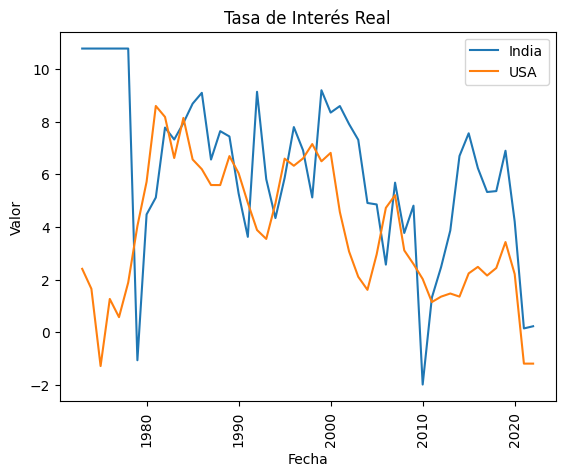

In [74]:
import matplotlib.pyplot as plt

tasa_interes_real_ind = df_merged[df_merged['country'] == 'India']['real_interest_rate'].reset_index(drop=True)[::-1]
tasa_interes_real_us = df_merged[df_merged['country'] == 'USA']['real_interest_rate'].reset_index(drop=True)[::-1]
date = df_merged['date'][50:100].reset_index(drop=True)[::-1]

fig, ax = plt.subplots()
ax.plot(date, tasa_interes_real_ind, label='India')
ax.plot(date, tasa_interes_real_us, label='USA')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Tasa de Interés Real')
ax.legend()
plt.xticks(rotation=90)
plt.show()


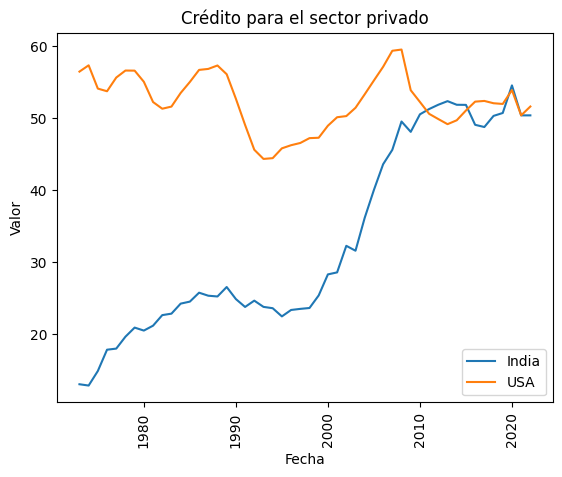

In [85]:
import matplotlib.pyplot as plt

credit_ind = df_merged[df_merged['country'] == 'India']['credit_to_private_sector'].reset_index(drop=True)[::-1]
credit_us = df_merged[df_merged['country'] == 'USA']['credit_to_private_sector'].reset_index(drop=True)[::-1]
date = df_merged['date'][50:100].reset_index(drop=True)[::-1]

fig, ax = plt.subplots()
ax.plot(date, credit_ind, label='India')
ax.plot(date, credit_us, label='USA')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Crédito para el sector privado')
ax.legend()
plt.xticks(rotation=90)
plt.show()

##### Conclusiones

Tras analizar los datos de la Tasa de Interés Real Anual en India, se puede observar que esta ha oscilado históricamente en un rango de 0 a 10 puntos porcentuales. Sin embargo, se ha observado una disminución significativa desde el inicio de la pandemia, con una tendencia que tiende hacia cero.

Esta disminución en la tasa de interés real puede indicar una política monetaria expansiva implementada para estimular la economía durante la crisis de la pandemia. Una tasa de interés real más baja puede incentivar la inversión y el gasto, lo que potencialmente impulsa el crecimiento económico.

Los datos de los Créditos al Sector Privado en India, se puede observar una tendencia positiva a lo largo de los años. Esta tendencia muestra que la proporción de créditos otorgados al sector privado ha incrementado gradualmente. Este aumento en los créditos al sector privado puede tener implicaciones positivas en el crecimiento y desarrollo económico de las empresas, así como en la generación de empleo.

Comparando la tasa de interes real por país, India tiene picos mas pronunciados, mientras que, USA durante la ultima decada ha mantenido una tasa de interes real baja.

En los ultimos años se puede evidenciar una convergencia en el credito al sector privado como porcentaje del PIB entre USA e India.